# Importing weekly player data

In [1]:
import requests
import json
import pandas as pd

## An example case

In [2]:
url = "http://fantasy.premierleague.com/drf/event/{}/live".format(input("Enter Game Week Number: "))

Enter Game Week Number: 3


In [3]:
url_text = requests.get(url).text
url_json = json.loads(url_text)

The stats for the players are within "elements", which includes an ID for each player. The stats can be selected for a chosen player for that Game Week.

In [4]:
player_1 = url_json['elements']['1']['stats']
player_1

{'yellow_cards': 0,
 'own_goals': 0,
 'creativity': 0.0,
 'goals_conceded': 1,
 'bonus': 0,
 'red_cards': 0,
 'saves': 4,
 'influence': 27.8,
 'bps': 17,
 'clean_sheets': 0,
 'assists': 0,
 'ict_index': 2.8,
 'goals_scored': 0,
 'threat': 0.0,
 'penalties_missed': 0,
 'total_points': 3,
 'penalties_saved': 0,
 'in_dreamteam': False,
 'minutes': 90}

In [5]:
pd.DataFrame(player_1, index=[1])

,yellow_cards,own_goals,creativity,goals_conceded,bonus,red_cards,saves,influence,bps,clean_sheets,assists,ict_index,goals_scored,threat,penalties_missed,total_points,penalties_saved,in_dreamteam,minutes
1,0,0,0.0,1,0,0,4,27.8,17,0,0,2.8,0,0.0,0,3,0,False,90


## For each player, for a chosen Game Week

In [6]:
player_nest = url_json['elements']
player_range = range(1, len(player_nest) + 1)

stats_GW5 = []

for pid in player_range:
    stats = player_nest[str(pid)]['stats']
    stats['id'] = pid
    stats_GW5.append(stats)
    
df_GW5 = pd.DataFrame.from_records(stats_GW5, index=['id'])

In [7]:
df_GW5.head()

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,in_dreamteam,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,threat,total_points,yellow_cards
id,,,,,,,,,,,,,,,,,,,
1,0,0,17,0,0.0,1,0,2.8,False,27.8,90,0,0,0,0,4,0.0,3,0
2,0,0,0,0,0.0,0,0,0.0,False,0.0,0,0,0,0,0,0,0.0,0,0
3,0,0,0,0,0.0,0,0,0.0,False,0.0,0,0,0,0,0,0,0.0,0,0
4,1,0,25,0,22.3,1,0,5.7,False,28.6,90,0,0,0,0,0,6.0,5,0
5,0,2,27,0,2.9,1,1,11.4,True,43.4,90,0,0,0,0,0,68.0,10,0


In [8]:
df_GW5[df_GW5['bps'] == 23]

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,in_dreamteam,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,threat,total_points,yellow_cards
id,,,,,,,,,,,,,,,,,,,
31,0,1,23,0,0.4,2,1,6.5,False,43.6,90,0,0,0,0,0,21.0,8,0
88,0,0,23,1,0.0,0,0,1.0,False,10.4,90,0,0,0,0,1,0.0,6,0
122,0,1,23,0,37.3,1,1,13.7,False,41.0,90,0,0,0,0,0,59.0,8,0
195,0,0,23,1,0.4,0,0,1.5,False,14.4,90,0,0,0,0,0,0.0,6,0
225,0,2,23,0,13.1,1,1,7.2,False,33.8,87,0,0,0,0,0,25.0,9,0
478,0,0,23,0,35.3,2,1,18.4,False,47.2,88,0,0,0,0,0,101.0,6,1


## For each Game Week, for a chosen player

In [9]:
base_url = "http://fantasy.premierleague.com/drf/event/{}/live"
pid = '234'

stats_player = []
for gw in range(1,11):
    url_text = requests.get(base_url.format(gw)).text
    url_json = json.loads(url_text)
    stats = url_json['elements'][pid]['stats']
    stats['gameweek'] = gw
    stats_player.append(stats)
    
df_player = pd.DataFrame.from_records(stats_player, index=['gameweek'])

In [10]:
df_player

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,in_dreamteam,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,threat,total_points,yellow_cards
gameweek,,,,,,,,,,,,,,,,,,,
1,0,1,25,0,14.5,1,1,9.1,False,35.0,27,0,0,0,0,0,41.0,6,0
2,0,0,-6,1,2.3,0,0,0.4,False,0.0,65,0,0,0,1,0,4.0,-1,0
3,0,0,0,0,0.0,0,0,0.0,False,0.0,0,0,0,0,0,0,0.0,0,0
4,0,0,0,0,0.0,0,0,0.0,False,0.0,0,0,0,0,0,0,0.0,0,0
5,0,0,-2,0,2.1,4,0,4.8,False,6.2,83,0,0,0,0,0,40.0,2,0
6,1,2,42,0,25.1,1,1,15.4,True,55.8,90,0,0,0,0,0,73.0,11,0
7,0,2,29,1,0.6,0,1,5.6,False,30.2,73,0,0,0,0,0,25.0,8,0
8,0,0,-3,0,14.6,2,0,4.8,False,0.6,90,0,0,0,0,0,33.0,2,0
9,0,0,5,0,0.0,3,0,0.3,False,1.0,90,0,0,0,0,0,2.0,2,0


## Verify linking between player data and game week breakdown
Working backwards from Vardy, I was able to identify the element in the Game Week breakdown. The elements in the Bootstrap Static data did not link. However, elements from the Game Week breakdown DO link the 'id' within the Bootstrap elements.

In [11]:
static = requests.get("https://fantasy.premierleague.com/drf/bootstrap-static")

In [12]:
json_static = json.loads(static.text)

In [13]:
for p in json_static['elements']:
    if p['id'] == 234:
        vardy = p
        break
vardy

{'id': 234,
 'photo': '101668.jpg',
 'web_name': 'Vardy',
 'team_code': 13,
 'status': 'a',
 'code': 101668,
 'first_name': 'Jamie',
 'second_name': 'Vardy',
 'squad_number': 9,
 'news': '',
 'now_cost': 90,
 'news_added': '2018-10-25T14:01:15Z',
 'chance_of_playing_this_round': 100,
 'chance_of_playing_next_round': 100,
 'value_form': '0.2',
 'value_season': '3.9',
 'cost_change_start': 0,
 'cost_change_event': 0,
 'cost_change_start_fall': 0,
 'cost_change_event_fall': 0,
 'in_dreamteam': False,
 'dreamteam_count': 1,
 'selected_by_percent': '4.9',
 'form': '1.8',
 'transfers_out': 512828,
 'transfers_in': 415170,
 'transfers_out_event': 8857,
 'transfers_in_event': 1880,
 'loans_in': 0,
 'loans_out': 0,
 'loaned_in': 0,
 'loaned_out': 0,
 'total_points': 35,
 'event_points': 2,
 'points_per_game': '3.5',
 'ep_this': '1.8',
 'ep_next': '2.3',
 'special': False,
 'minutes': 743,
 'goals_scored': 3,
 'assists': 1,
 'clean_sheets': 4,
 'goals_conceded': 11,
 'own_goals': 0,
 'penalties_

## Measuring Vardy's performance over time

### Cleansing the Data
The Game Week data contains 10 weeks so far. Unfortunately, Vardy got a red card in his second game week. As a result he missed the next 2 games. To measure his actual performance, those empty game weeks should be removed.

In [14]:
df_vardy = df_player.copy()

In [15]:
df_vardy = df_vardy[df_vardy['minutes'] != 0]

In [16]:
df_vardy

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,in_dreamteam,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,threat,total_points,yellow_cards
gameweek,,,,,,,,,,,,,,,,,,,
1,0,1,25,0,14.5,1,1,9.1,False,35.0,27,0,0,0,0,0,41.0,6,0
2,0,0,-6,1,2.3,0,0,0.4,False,0.0,65,0,0,0,1,0,4.0,-1,0
5,0,0,-2,0,2.1,4,0,4.8,False,6.2,83,0,0,0,0,0,40.0,2,0
6,1,2,42,0,25.1,1,1,15.4,True,55.8,90,0,0,0,0,0,73.0,11,0
7,0,2,29,1,0.6,0,1,5.6,False,30.2,73,0,0,0,0,0,25.0,8,0
8,0,0,-3,0,14.6,2,0,4.8,False,0.6,90,0,0,0,0,0,33.0,2,0
9,0,0,5,0,0.0,3,0,0.3,False,1.0,90,0,0,0,0,0,2.0,2,0
10,0,0,-4,0,0.8,0,0,3.6,False,0.0,45,0,0,0,0,0,36.0,1,0


Looking at the data, there is not much that can be ascertained without considering the teams which were playing and the proportion of goals attributed to Vardy, compared the rest of his team. What we can see however is the increase in performance in gameweeks 5-7, and also a fairly strong correlation between the ICT Index and total points. No doubt, the same factors which get points also influences the ICT Index, and the correlation is by nature of the underlying features shared. 

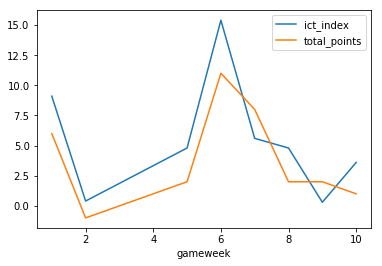

In [33]:
df_vardy[['ict_index', 'total_points']].plot(kind='line')